# Understanding Backpropagation

We will understand the basics of backpropagation through some calculation examples and visualisation. Think of backpropagation as teaching a student through feedback. When a student gets an answer wrong, we don't just say "wrong" – we explain what went wrong and how to improve. That's exactly what backpropagation does for neural networks.

Today we'll build a tiny neural network from scratch and watch it learn through three key steps:
1. **Forward Pass**: Making a prediction
2. **Backward Pass**: Calculating what went wrong
3. **Gradient Descent**: Improving for next time

Let's dive in!


In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Our Tiny Neural Network

Imagine we're teaching a network to learn a simple pattern: given input `x`, we want it to output `2x`. 

Our network has just:
- 1 input neuron
- 1 output neuron  
- 1 weight connecting them
- 1 bias term

This is as simple as it gets, but it perfectly demonstrates all the key concepts.


In [23]:
# Initialize our network parameters randomly
weight = np.random.randn()  # Random weight
bias = np.random.randn()    # Random bias

# Training data: we want to learn f(x) = 2x
x = 3.0 # Input
target = 6.0 # Target output (2 * 3 = 6)

print(f"Initial weight: {weight:.3f}")
print(f"Initial bias: {bias:.3f}")
print(f"We want to learn: f({x}) = {target}")


Initial weight: 0.497
Initial bias: -0.138
We want to learn: f(3.0) = 6.0


## Step 1: Forward Pass - Making a Prediction

The forward pass is like asking our network: "What do you think the answer is?"

Our network computes: `output = weight × input + bias`

This is the network's current best guess based on what it has learned so far.


In [24]:
# Forward pass: compute the prediction
output = weight * x + bias

# Calculate the loss (how wrong we are)
loss = (output - target) ** 2

print(f"Network's prediction: {output:.3f}")
print(f"Target: {target}")
print(f"Loss (error squared): {loss:.3f}")
print(f"We're off by: {abs(output - target):.3f}")


Network's prediction: 1.352
Target: 6.0
Loss (error squared): 21.605
We're off by: 4.648


## Step 2: Backward Pass - Understanding the Mistake

Now comes the magic! The backward pass asks: "How should we adjust each parameter to reduce the error?"

We use calculus (chain rule) to find gradients:
- `∂loss/∂weight = 2 × (output - target) × input`
- `∂loss/∂bias = 2 × (output - target)`

These gradients tell us the direction and magnitude to adjust each parameter.


In [25]:
# Backward pass: compute gradients
error = output - target
grad_weight = 2 * error * x  # How much to change weight
grad_bias = 2 * error        # How much to change bias

print(f"Error: {error:.3f}")
print(f"Gradient for weight: {grad_weight:.3f}")
print(f"Gradient for bias: {grad_bias:.3f}")
print("Positive gradient means we should decrease the parameter")


Error: -4.648
Gradient for weight: -27.889
Gradient for bias: -9.296
Positive gradient means we should decrease the parameter


## Step 3: Gradient Descent - Learning from Mistakes

Gradient descent is like taking a step in the direction that reduces our error. The learning rate controls how big steps we take - too big and we might overshoot, too small and we learn very slowly.


In [26]:
# Gradient descent: update parameters
learning_rate = 0.01

weight = weight - learning_rate * grad_weight
bias = bias - learning_rate * grad_bias

print(f"Updated weight: {weight:.3f}")
print(f"Updated bias: {bias:.3f}")

# Test our improved network
new_output = weight * x + bias
new_loss = (new_output - target) ** 2

print(f"\nAfter one learning step:")
print(f"New prediction: {new_output:.3f}")
print(f"New loss: {new_loss:.3f}")
print(f"Loss reduced by: {loss - new_loss:.3f}")


Updated weight: 0.776
Updated bias: -0.045

After one learning step:
New prediction: 2.282
New loss: 13.827
Loss reduced by: 7.778


## Watching Our Network Learn

Let's run many iterations and watch the magic happen!


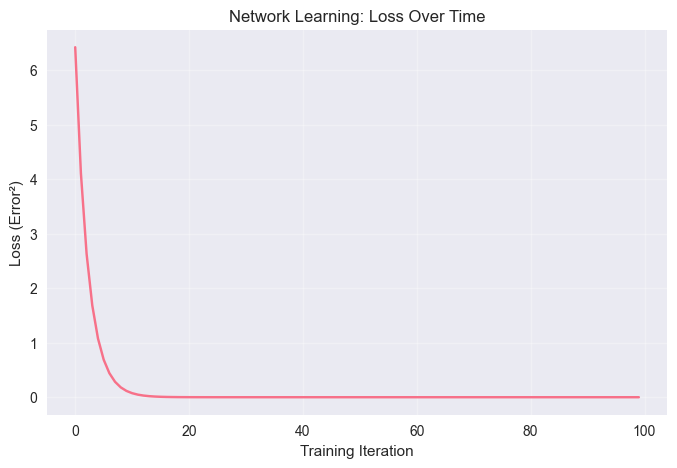

Final weight: 1.408 (should be close to 2.0)
Final bias: 1.776 (should be close to 0.0)
Final prediction: 6.000 (target: 6.0)


In [27]:
# Reset and train for multiple iterations
weight = np.random.randn()
bias = np.random.randn()
losses = []

for i in range(100):
    # Forward pass
    output = weight * x + bias
    loss = (output - target) ** 2
    losses.append(loss)
    
    # Backward pass
    error = output - target
    grad_weight = 2 * error * x
    grad_bias = 2 * error
    
    # Gradient descent
    weight -= learning_rate * grad_weight
    bias -= learning_rate * grad_bias

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title('Network Learning: Loss Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Loss (Error²)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final weight: {weight:.3f} (should be close to 2.0)")
print(f"Final bias: {bias:.3f} (should be close to 0.0)")
print(f"Final prediction: {weight * x + bias:.3f} (target: {target})")


## Wrapping Up The Backpropagation

What we had done is the fundamental learning mechanism behind all deep learning models

**Key Takeaways:**
1. **Forward Pass**: The network makes predictions based on current parameters
2. **Loss Calculation**: We measure how wrong the prediction is
3. **Backward Pass**: We calculate gradients that tell us how to improve
4. **Gradient Descent**: We adjust parameters in the direction that reduces error

Even the most complex neural networks with millions of parameters follow this exact same process. The math gets more complex, but the core idea remains the same: forward pass, backward pass, optimize, repeat.

This simple example shows how a network can learn to approximate any function, given enough data and the right architecture.
